# Part 5.2: Model Selection - Overfitting vs. Underfitting

A central challenge in machine learning is the **bias-variance tradeoff**.

- **High Bias (Underfitting)**: The model is too simple to capture the underlying pattern in the data. It performs poorly on both the training and test data.
- **High Variance (Overfitting)**: The model is too complex and learns the noise in the training data, not just the signal. It performs very well on the training data but poorly on unseen test data.

**Learning curves** are a powerful tool to diagnose which of these problems your model might have.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_digits
from sklearn.svm import SVC

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    return plt

X, y = load_digits(return_X_y=True)

### Example: A Good Fit

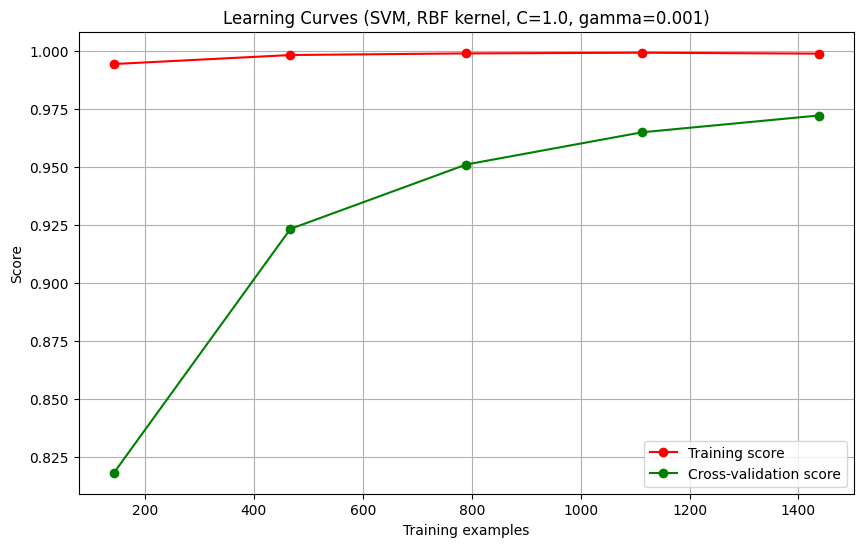

Interpretation: The training and validation scores converge to a high value. This is a good fit.


In [2]:
title = "Learning Curves (SVM, RBF kernel, C=1.0, gamma=0.001)"
estimator = SVC(gamma=0.001, C=1.0)
plot_learning_curve(estimator, title, X, y, cv=5)
plt.show()
print("Interpretation: The training and validation scores converge to a high value. This is a good fit.")

### Example: Overfitting (High Variance)

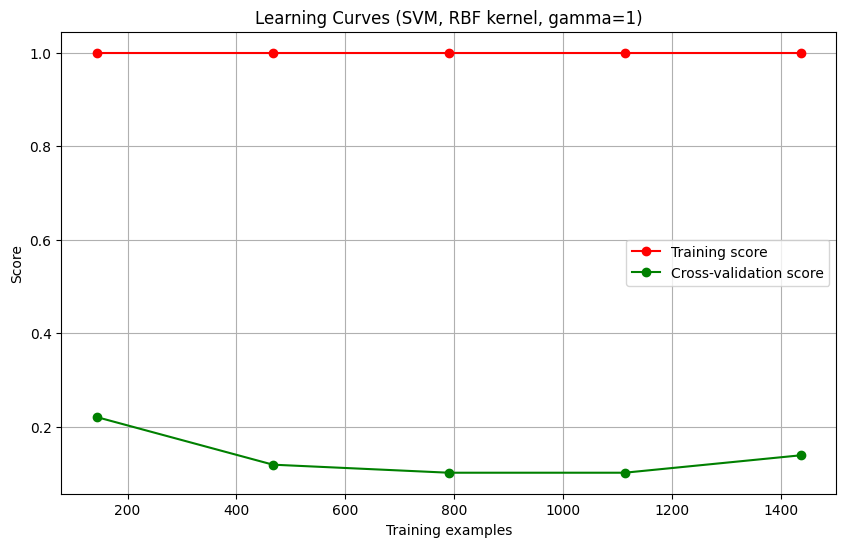

Interpretation: There is a large gap between the high training score and the low validation score. The model is overfitting.


In [3]:
# A very high gamma makes the model too complex
title = "Learning Curves (SVM, RBF kernel, gamma=1)"
estimator = SVC(gamma=1)
plot_learning_curve(estimator, title, X, y, cv=5)
plt.show()
print("Interpretation: There is a large gap between the high training score and the low validation score. The model is overfitting.")

### Example: Underfitting (High Bias)

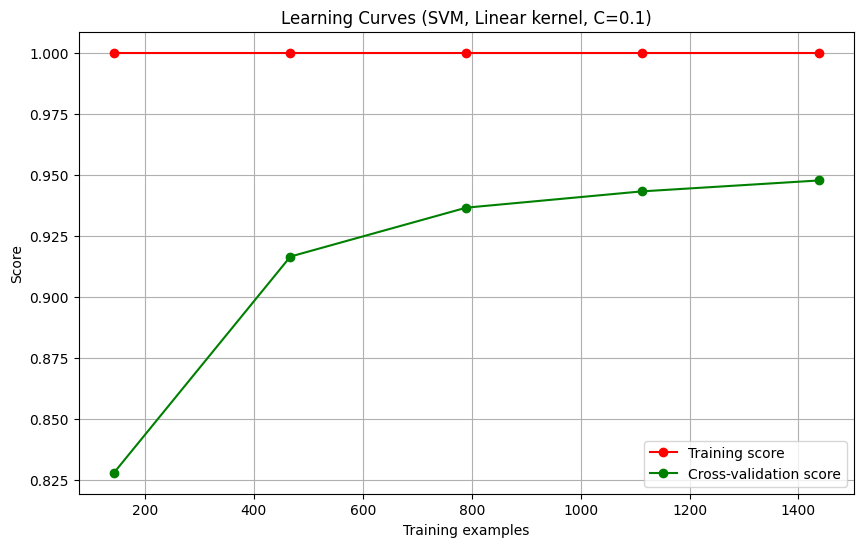

Interpretation: Both the training and validation scores are low and have converged. The model is underfitting.


In [4]:
# A linear kernel might be too simple for this dataset
title = "Learning Curves (SVM, Linear kernel, C=0.1)"
estimator = SVC(kernel='linear', C=0.1)
plot_learning_curve(estimator, title, X, y, cv=5)
plt.show()
print("Interpretation: Both the training and validation scores are low and have converged. The model is underfitting.")